In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo csv
dfB=pd.read_csv('Limpio_Brasil.csv')
#eliminamos la columna unnamed 
dfB= dfB.drop(['Unnamed: 0'], axis=1)
dfB.head(5)

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,25/09/2024,city scrape,"Fascinating Rio, on the hills!",Your best option to stay if you want to visit ...,Marcia Longras,09/04/2011,"Rio de Janeiro, Brazil","I'm a Brazilian lady, I was born in Rio de Jan...",within a few hours,93%,...,1.0,4.69,4.82,4.58,4.90,4.85,4.90,4.64,11.0,0.22
1,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,"The studio is in an excellent location , dire...",Erika,02/12/2011,"Rio de Janeiro, Brazil","Sou Erika tenho 37 anos ,casada, formada em ...",within a day,50%,...,0.0,4.67,5.00,4.90,4.90,5.00,4.90,4.67,3.0,0.02
2,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I","Bedroom and living room, with a private bathro...",Renato / Louri,18/03/2011,"Rio de Janeiro, Brazil",*French version below \r\n\r\nWe host internat...,within an hour,99%,...,0.0,4.71,4.82,4.79,4.82,4.88,4.90,4.65,6.0,0.22
3,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,Our apartment is the perfect choice for those ...,Nilda,06/09/2011,"Rio de Janeiro, Brazil",Gosto de conhecer pessoas e novas culturas e ...,within an hour,100%,...,2.0,5.00,4.94,5.00,5.00,5.00,4.83,4.92,1.0,0.51
4,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",Your best option to stay if you want to visit ...,Jaqueline,04/12/2011,"Rio de Janeiro, Brazil",SimpÃ¡tica e gosto de novos amigos. Meu lazer...,within a day,50%,...,0.0,4.68,4.80,4.76,4.80,4.83,4.77,4.60,1.0,0.24


In [3]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36967 entries, 0 to 36966
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    36967 non-null  object 
 1   source                          36967 non-null  object 
 2   name                            36967 non-null  object 
 3   description                     36967 non-null  object 
 4   host_name                       36967 non-null  object 
 5   host_since                      36967 non-null  object 
 6   host_location                   36967 non-null  object 
 7   host_about                      36967 non-null  object 
 8   host_response_time              36967 non-null  object 
 9   host_response_rate              36967 non-null  object 
 10  host_acceptance_rate            36967 non-null  object 
 11  host_is_superhost               36967 non-null  object 
 12  host_verifications              

In [4]:
f1=dfB

In [5]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36967 entries, 0 to 36966
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    36967 non-null  object 
 1   source                          36967 non-null  object 
 2   name                            36967 non-null  object 
 3   description                     36967 non-null  object 
 4   host_name                       36967 non-null  object 
 5   host_since                      36967 non-null  object 
 6   host_location                   36967 non-null  object 
 7   host_about                      36967 non-null  object 
 8   host_response_time              36967 non-null  object 
 9   host_response_rate              36967 non-null  object 
 10  host_acceptance_rate            36967 non-null  object 
 11  host_is_superhost               36967 non-null  object 
 12  host_verifications              

In [6]:
#convertimos las variables de tipo object a tipo numérico 
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\Usuario-Huawei\AppData\Local\Temp\ipykernel_25028\1997020323.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})


In [7]:
#Filtramos por tipo de cuarto
f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

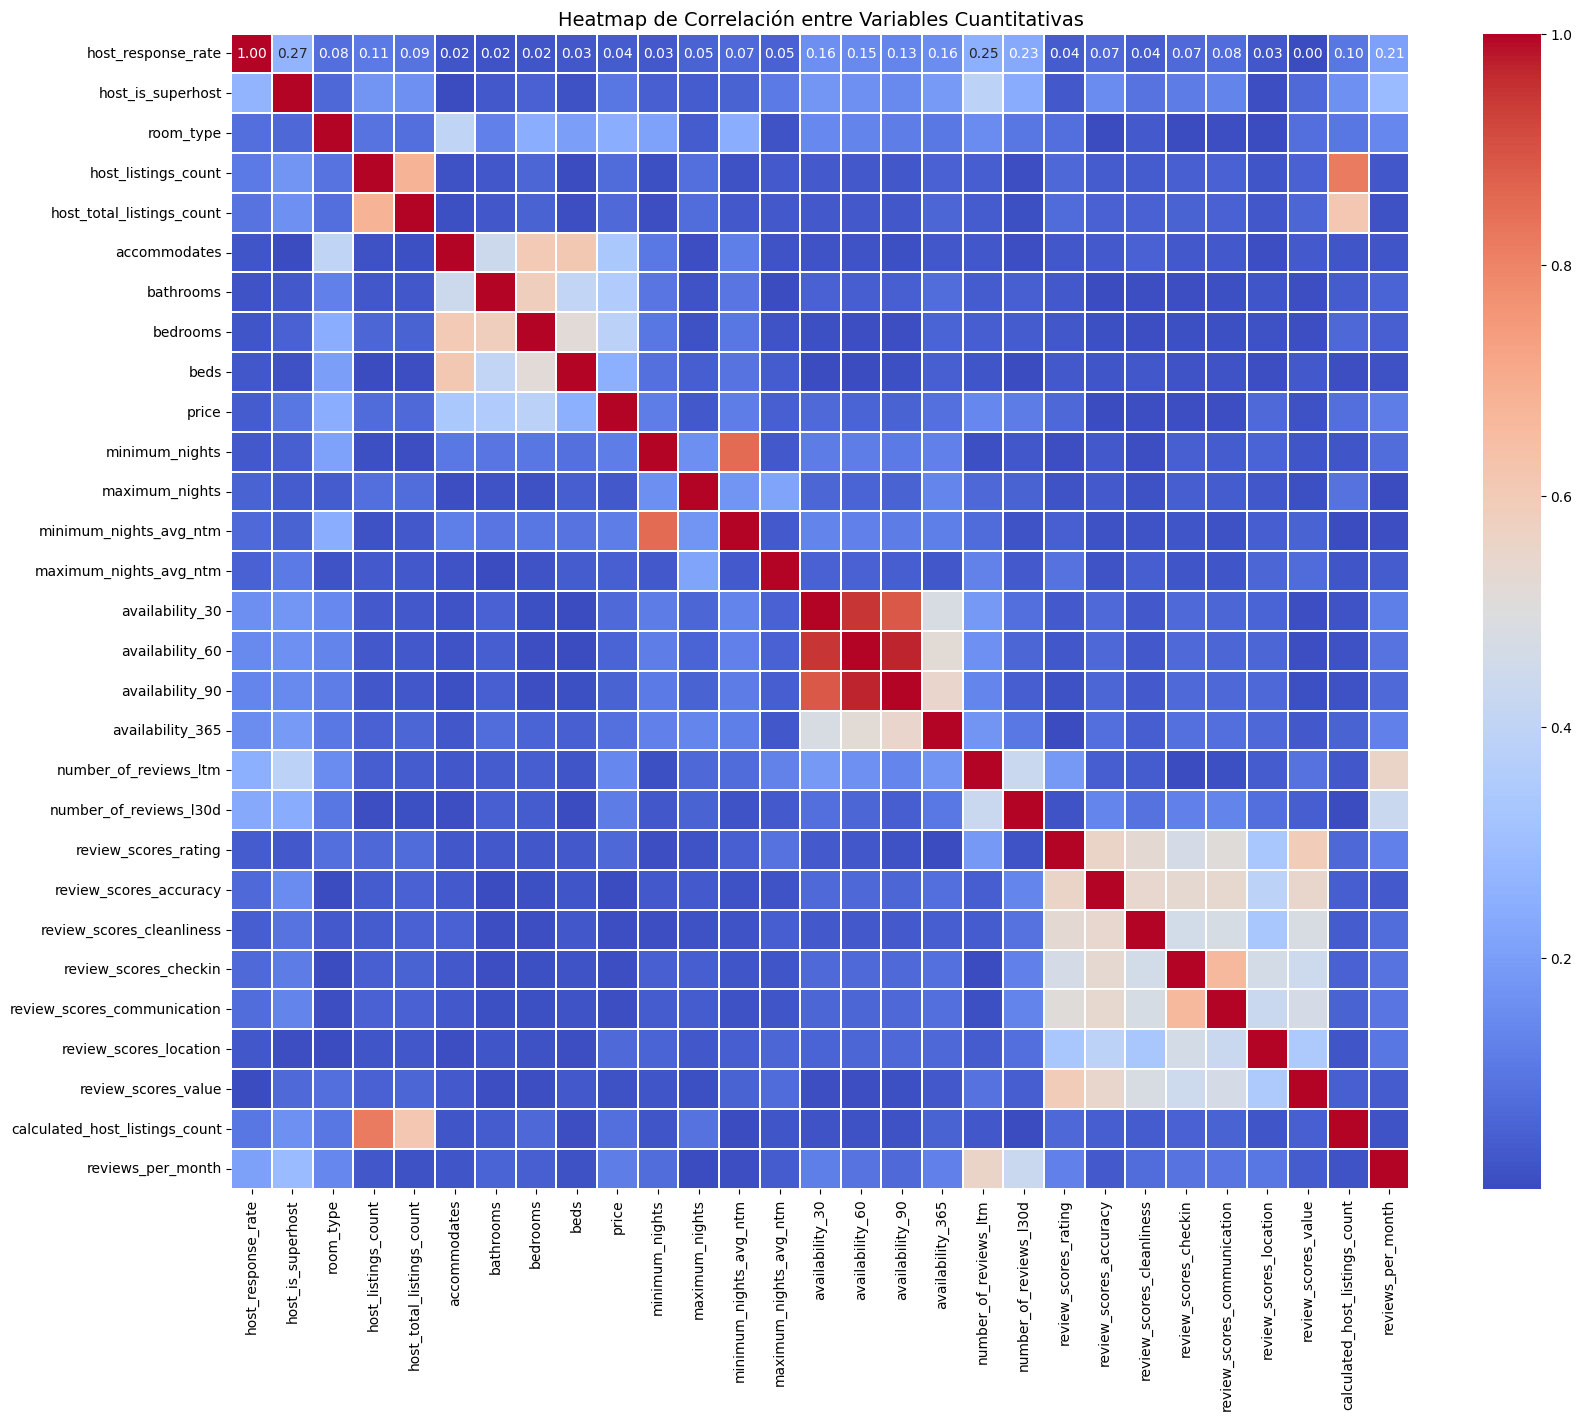

In [8]:
df_numeric = f1.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()
corr_matrix2= abs(corr_matrix)

# Crear el heatmap
plt.figure(figsize=(19, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

# Configurar el título
plt.title("Heatmap de Correlación entre Variables Cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

<Axes: xlabel='number_of_reviews_ltm', ylabel='price'>

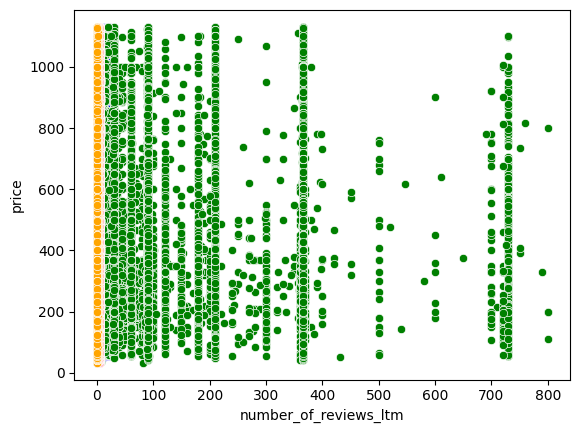

In [9]:
from turtle import color


sns.scatterplot(x='number_of_reviews_ltm', y='price', color="blue", data=f1)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="red", data=f1)
sns.scatterplot(x='maximum_nights', y='price', color="green", data=f1)
sns.scatterplot(x='review_scores_communication', y='price', color="pink", data=f1)
sns.scatterplot(x='reviews_per_month', y='price', color="orange", data=f1)

<Axes: xlabel='host_is_superhost', ylabel='host_response_rate'>

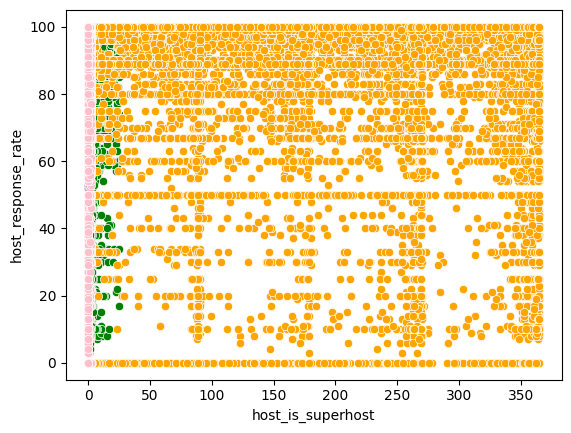

In [10]:
from turtle import color

sns.scatterplot(x='host_is_superhost', y='host_response_rate', color="blue", data=f1)
sns.scatterplot(x='reviews_per_month', y='host_response_rate', color="red", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='host_response_rate', color="green", data=f1)
sns.scatterplot(x='availability_365', y='host_response_rate', color="orange", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='host_response_rate', color="pink", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

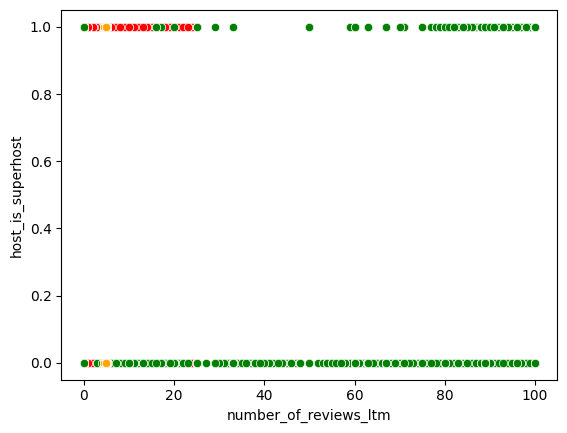

In [11]:
from turtle import color


sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="red", data=f1)
sns.scatterplot(x='host_response_rate', y='host_is_superhost', color="green", data=f1)
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="pink", data=f1)
sns.scatterplot(x='review_scores_value', y='host_is_superhost', color="orange", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

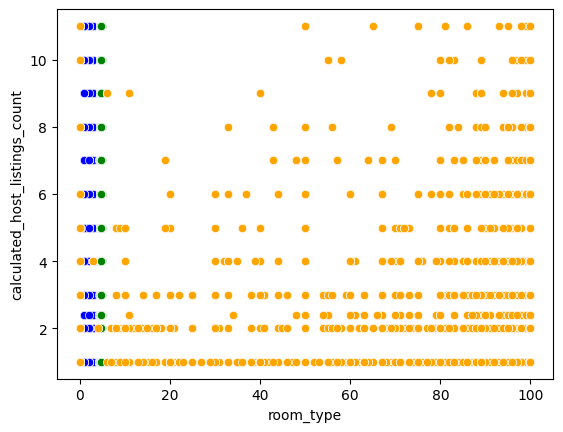

In [12]:
from turtle import color


sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='review_scores_value', y='calculated_host_listings_count', color="green", data=f1)
sns.scatterplot(x='host_response_rate', y='calculated_host_listings_count', color="orange", data=f1)


<Axes: xlabel='price', ylabel='room_type'>

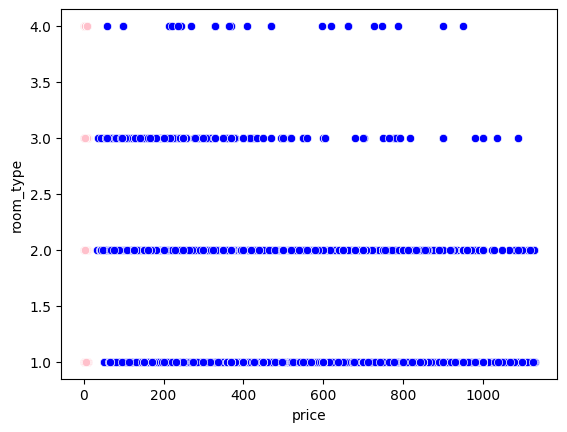

In [13]:
from turtle import color

sns.scatterplot(x='price', y='room_type', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='room_type', color="red", data=f1)
sns.scatterplot(x='bedrooms', y='room_type', color="green", data=f1)
sns.scatterplot(x='beds', y='room_type', color="orange", data=f1)
sns.scatterplot(x='calculated_host_listings_count', y='room_type', color="pink", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

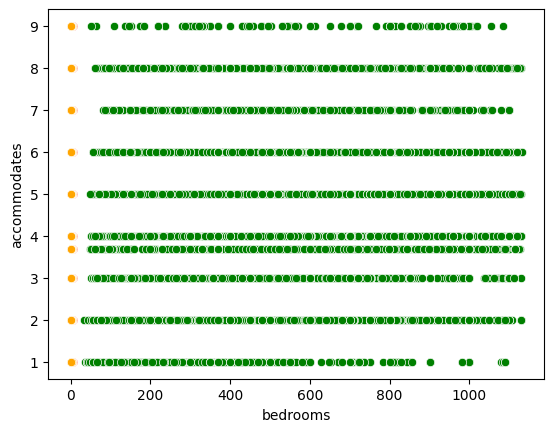

In [14]:
from turtle import color

sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='beds', y='accommodates', color="red", data=f1)
sns.scatterplot(x='price', y='accommodates', color="green", data=f1)
sns.scatterplot(x='room_type', y='accommodates', color="orange", data=f1)

<Axes: xlabel='price', ylabel='bedrooms'>

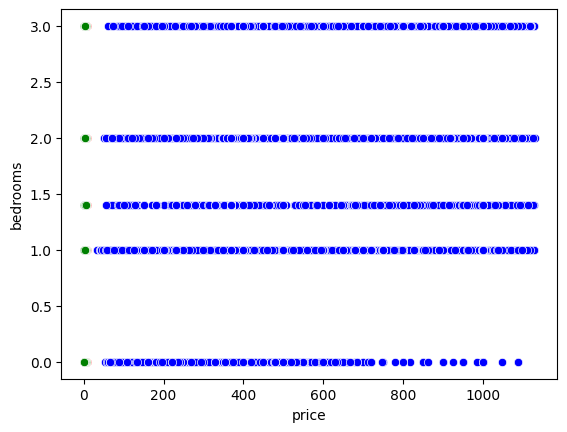

In [15]:
from turtle import color

sns.scatterplot(x='price', y='bedrooms', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='bedrooms', color="red", data=f1)
sns.scatterplot(x='beds', y='bedrooms', color="green", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

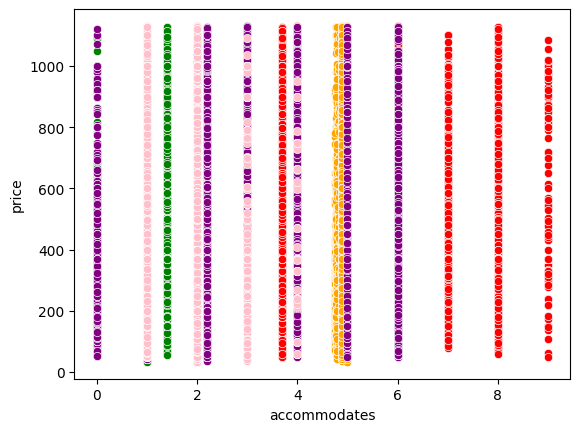

In [16]:
from turtle import color

sns.scatterplot(x='accommodates', y='price', color="red", data=f1)
sns.scatterplot(x='bedrooms', y='price', color="green", data=f1)
sns.scatterplot(x='review_scores_location', y='price', color="orange", data=f1)
sns.scatterplot(x='beds', y='price', color="purple", data=f1)
sns.scatterplot(x='room_type', y='price', color="pink", data=f1)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_value'>

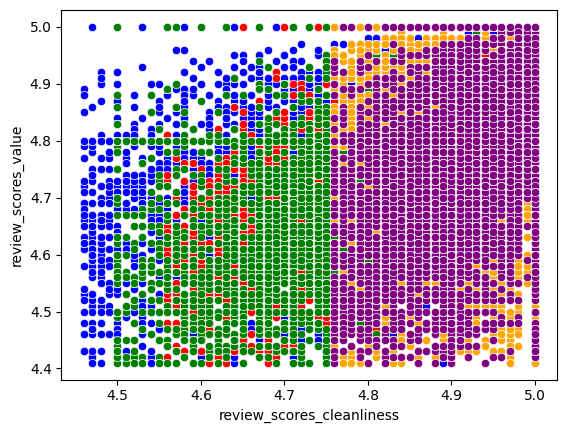

In [17]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_value', color="blue", data=f1)
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="red", data=f1)
sns.scatterplot(x='review_scores_accuracy', y='review_scores_value', color="green", data=f1)
sns.scatterplot(x='review_scores_location', y='review_scores_value', color="orange", data=f1)
sns.scatterplot(x='review_scores_communication', y='review_scores_value', color="purple", data=f1)


<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

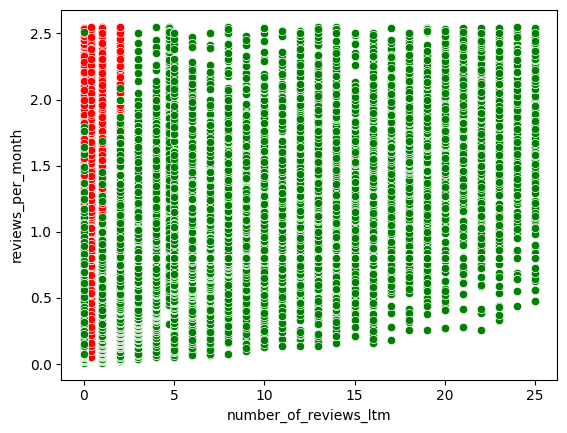

In [18]:
from turtle import color

sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="red", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="green", data=f1)

In [19]:
#declaración de las variables independientes que se van a comparar con cada variable dependiente asignada 
Vars_Indep= f1[['review_scores_cleanliness', 'maximum_nights', 'review_scores_communication', 'reviews_per_month']]
Vars_Indep2=f1[['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm', 'availability_365', 'number_of_reviews_l30d', 'availability_90', 'availability_60', 'availability_30']]
Vars_Indep3=f1[['number_of_reviews_ltm','host_response_rate','review_scores_rating', 'review_scores_value', 'reviews_per_month']]
Vars_Indep4=f1[['room_type', 'review_scores_value', 'host_response_rate']]
Vars_Indep5=f1[['price', 'accommodates', 'bedrooms',  'beds', 'calculated_host_listings_count']]
Vars_Indep6=f1[['bedrooms', 'beds', 'price', 'room_type']]
Vars_Indep7=f1[['accommodates', 'beds', 'price']]
Vars_Indep8=f1[['accommodates', 'bedrooms', 'review_scores_location', 'beds', 'room_type']]
Vars_Indep9=f1[['review_scores_cleanliness', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_location', 'review_scores_communication']]
Vars_Indep10=f1[['number_of_reviews_l30d', 'number_of_reviews_ltm']]


In [20]:
#Declaración de variables dependientes
#Var_Dep= f1['id']
Var_Dep2= f1['host_response_rate']
Var_Dep3= f1['host_is_superhost']
Var_Dep4= f1['calculated_host_listings_count']
Var_Dep5= f1['room_type']
Var_Dep6= f1['accommodates']
Var_Dep7= f1['bedrooms']
Var_Dep8= f1['price']
Var_Dep9= f1['review_scores_value']
Var_Dep10= f1['reviews_per_month']

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model2=LinearRegression()
model3= LinearRegression()
model4=LinearRegression()
model5= LinearRegression()
model6=LinearRegression()
model7= LinearRegression()
model8=LinearRegression()
model9= LinearRegression()
model10=LinearRegression()

In [22]:
#Verificamos la función relacionada al modelo
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
#model.fit(X=Vars_Indep, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep2)
model3.fit(X=Vars_Indep3, y=Var_Dep3)
model4.fit(X=Vars_Indep4, y=Var_Dep4)
model5.fit(X=Vars_Indep5, y=Var_Dep5)
model6.fit(X=Vars_Indep6, y=Var_Dep6)
model7.fit(X=Vars_Indep7, y=Var_Dep7)
model8.fit(X=Vars_Indep8, y=Var_Dep8)
model9.fit(X=Vars_Indep9, y=Var_Dep9)
model10.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [24]:
#Declaración de variables dependientes
Var_Dep2= f1['host_response_rate']
Var_Dep3= f1['host_is_superhost']
Var_Dep4= f1['calculated_host_listings_count']
Var_Dep5= f1['room_type']
Var_Dep6= f1['accommodates']
Var_Dep7= f1['bedrooms']
Var_Dep8= f1['price']
Var_Dep9= f1['review_scores_value']
Var_Dep10= f1['reviews_per_month']

In [25]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model2=LinearRegression()
model3= LinearRegression()
model4=LinearRegression()
model5= LinearRegression()
model6=LinearRegression()
model7= LinearRegression()
model8=LinearRegression()
model9= LinearRegression()
model10=LinearRegression()

In [26]:
#Verificamos la función relacionada al modelo
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [27]:
#Ajustamos el modelo con las variables antes declaradas
#model.fit(X=Vars_Indep, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep2)
model3.fit(X=Vars_Indep3, y=Var_Dep3)
model4.fit(X=Vars_Indep4, y=Var_Dep4)
model5.fit(X=Vars_Indep5, y=Var_Dep5)
model6.fit(X=Vars_Indep6, y=Var_Dep6)
model7.fit(X=Vars_Indep7, y=Var_Dep7)
model8.fit(X=Vars_Indep8, y=Var_Dep8)
model9.fit(X=Vars_Indep9, y=Var_Dep9)
model10.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [28]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False}

In [29]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model2.score(Vars_Indep2,Var_Dep2)

0.12396560197457063

In [30]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'host_response_rate',
        'review_scores_rating', 'review_scores_value', 'reviews_per_month'],
       dtype=object),
 'n_features_in_': 5,
 'coef_': array([0.02374903, 0.00324638, 0.31853159, 0.20570815, 0.07139471]),
 'rank_': 5,
 'singular_': array([4633.87339316, 1134.78609983,   88.56691039,   28.57218159,
          13.29730017]),
 'intercept_': -2.7086999742727547}

In [31]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3.score(Vars_Indep3,Var_Dep3)

0.19996307811504688

In [32]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'review_scores_value', 'host_response_rate'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.50440929, -0.85056442,  0.00938659]),
 'rank_': 3,
 'singular_': array([4623.78861719,   89.24387309,   25.53160374]),
 'intercept_': 5.050011671298066}

In [33]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4.score(Vars_Indep4,Var_Dep4)

0.02441519474073972

In [34]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price', 'accommodates', 'bedrooms', 'beds',
        'calculated_host_listings_count'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-0.00026606, -0.11686314,  0.01276868,  0.02864998,  0.01849322]),
 'rank_': 5,
 'singular_': array([42000.51306812,   400.17959397,   349.70682538,   166.68366549,
          100.61270354]),
 'intercept_': 1.6377241582750064}

In [35]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5.score(Vars_Indep5,Var_Dep5)

0.1867086600778205

In [36]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'price', 'room_type'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 7.54197178e-01,  5.10779743e-01,  4.61455976e-04, -8.24593910e-01]),
 'rank_': 4,
 'singular_': array([42000.3663524 ,   242.21819657,   107.78719219,    84.49132954]),
 'intercept_': 2.371847619785969}

In [37]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6.score(Vars_Indep6,Var_Dep6)

0.5438538274454661

In [38]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.17093802, 0.12873847, 0.00063246]),
 'rank_': 3,
 'singular_': array([42000.46765572,   341.32625711,   166.6629589 ]),
 'intercept_': 0.27133834373521326}

In [39]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model7.score(Vars_Indep7,Var_Dep7)

0.43226978908951663

In [40]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'review_scores_location', 'beds',
        'room_type'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([ 14.44189346,  85.5959908 , 247.06969228,   2.71704025,
        -61.20354539]),
 'rank_': 5,
 'singular_': array([375.86757188, 167.71457276, 103.1009825 ,  80.98556789,
         11.08669082]),
 'intercept_': -954.794035403688}

In [41]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model8.score(Vars_Indep8,Var_Dep8)

0.1857650978260812

In [42]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_rating',
        'review_scores_accuracy', 'review_scores_location',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([0.11665014, 0.47531593, 0.24311857, 0.16466418, 0.21328459]),
 'rank_': 5,
 'singular_': array([33.08310631, 16.05400997, 13.38421379, 10.27429624,  7.90765544]),
 'intercept_': -1.124172803781204}

In [43]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model9.score(Vars_Indep9,Var_Dep9)

0.445412650309147

In [44]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_l30d', 'number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([0.19808943, 0.04149883]),
 'rank_': 2,
 'singular_': array([1174.98032369,  115.56286931]),
 'intercept_': 0.48097339476142814}

In [45]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model10.score(Vars_Indep10,Var_Dep10)

0.35574041186664274

In [46]:
#Predecimos los valores a partir de las variables independientes 
y_pred2= model2.predict(X=Vars_Indep2)
y_pred2

array([84.90792857, 77.68267601, 94.71137039, ..., 78.667955  ,
       79.49028704, 78.667955  ])

In [47]:
#Predecimos los valores a partir de las variables independientes 
y_pred3= model3.predict(X=Vars_Indep3)
y_pred3

array([ 0.1523156 , -0.09675332,  0.22771967, ...,  0.21411858,
        0.21411858,  0.21411858])

In [48]:
#Predecimos los valores a partir de las variables independientes 
y_pred4= model4.predict(X=Vars_Indep4)
y_pred4

array([2.98516397, 2.05161449, 2.52856856, ..., 2.41037049, 2.41037049,
       2.41037049])

In [49]:
#Predecimos los valores a partir de las variables independientes 
y_pred5= model5.predict(X=Vars_Indep5)
y_pred5

array([1.57700585, 1.49425953, 1.24841891, ..., 1.26110117, 1.43690676,
       1.27148164])

In [50]:
#Predecimos los valores a partir de las variables independientes 
y_pred6= model6.predict(X=Vars_Indep6)
y_pred6

array([2.11222984, 3.72880948, 2.94097685, ..., 3.41530157, 2.8911396 ,
       3.46144717])

In [51]:
#Predecimos los valores a partir de las variables independientes 
y_pred7= model7.predict(X=Vars_Indep7)
y_pred7

array([0.91271728, 1.3179065 , 1.26028546, ..., 1.33905951, 0.85010365,
       1.4023056 ])

In [52]:
#Predecimos los valores a partir de las variables independientes 
y_pred8= model8.predict(X=Vars_Indep8)
y_pred8

array([250.63718396, 234.3958593 , 340.72451628, ..., 343.44155653,
       311.84072935, 343.44155653])

In [53]:
#Predecimos los valores a partir de las variables independientes 
y_pred9= model9.predict(X=Vars_Indep9)
y_pred9

array([4.65243279, 4.75600855, 4.69283418, ..., 4.78371403, 4.78371403,
       4.78371403])

In [54]:
#Predecimos los valores a partir de las variables independientes 
y_pred10= model10.predict(X=Vars_Indep10)
y_pred10

array([0.84505812, 0.48097339, 0.72996635, ..., 0.48097339, 0.48097339,
       0.48097339])

In [55]:
f1.insert(1, 'Pred_1', y_pred2)
f1.insert(2, 'Pred_2', y_pred3)
f1.insert(3, 'Pred_3', y_pred4)
f1.insert(4, 'Pred_4', y_pred5)
f1.insert(5, 'Pred_5', y_pred6)
f1.insert(6, 'Pred_6', y_pred7)
f1.insert(7, 'Pred_7', y_pred8)
f1.insert(8, 'Pred_8', y_pred9)
f1.insert(9, 'Pred_9', y_pred10)
f1

,last_scraped,Pred_1,Pred_2,Pred_3,Pred_4,Pred_5,Pred_6,Pred_7,Pred_8,Pred_9,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,25/09/2024,84.907929,0.152316,2.985164,1.577006,2.112230,0.912717,250.637184,4.652433,0.845058,...,1.0,4.69,4.82,4.58,4.90,4.85,4.90,4.64,11.0,0.22
1,25/09/2024,77.682676,-0.096753,2.051614,1.494260,3.728809,1.317907,234.395859,4.756009,0.480973,...,0.0,4.67,5.00,4.90,4.90,5.00,4.90,4.67,3.0,0.02
2,26/09/2024,94.711370,0.227720,2.528569,1.248419,2.940977,1.260285,340.724516,4.692834,0.729966,...,0.0,4.71,4.82,4.79,4.82,4.88,4.90,4.65,6.0,0.22
3,25/09/2024,108.909665,0.708323,2.308303,1.152673,4.283478,1.495277,411.742669,4.898414,1.665630,...,2.0,5.00,4.94,5.00,5.00,5.00,4.83,4.92,1.0,0.51
4,25/09/2024,80.418863,-0.044763,2.111154,1.369725,2.975586,0.965844,279.721669,4.638142,0.563971,...,0.0,4.68,4.80,4.76,4.80,4.83,4.77,4.60,1.0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,25/09/2024,90.334230,0.214119,2.914780,1.396980,3.066878,1.249425,270.513158,4.783714,0.480973,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,2.4,0.70
36963,26/09/2024,78.667955,0.178408,2.307118,0.963381,3.430068,1.701174,372.325343,4.783714,0.480973,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,1.0,0.70
36964,25/09/2024,78.667955,0.214119,2.410370,1.261101,3.415302,1.339060,343.441557,4.783714,0.480973,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,4.0,0.70
36965,25/09/2024,79.490287,0.214119,2.410370,1.436907,2.891140,0.850104,311.840729,4.783714,0.480973,...,0.0,4.90,4.80,4.80,4.90,4.90,4.90,4.80,2.0,0.70


<Axes: xlabel='host_is_superhost', ylabel='host_response_rate'>

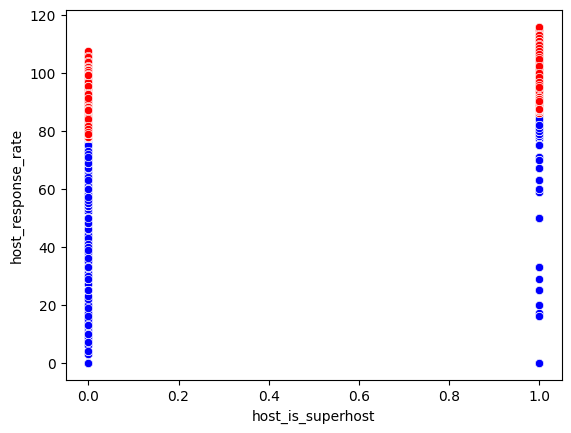

In [56]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='host_is_superhost', y='host_response_rate', color="blue", data=f1)
sns.scatterplot(x='host_is_superhost', y='Pred_1', color="red", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

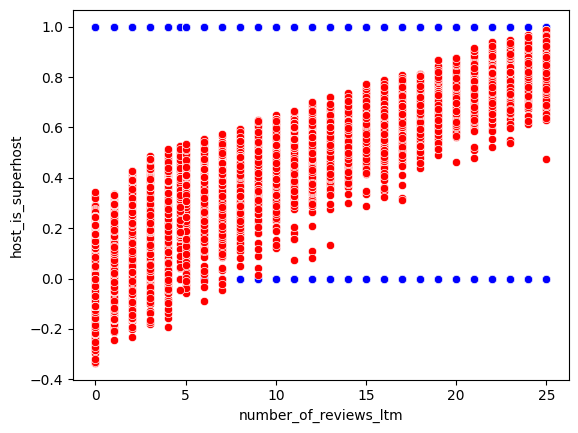

In [57]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_2', color="red", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

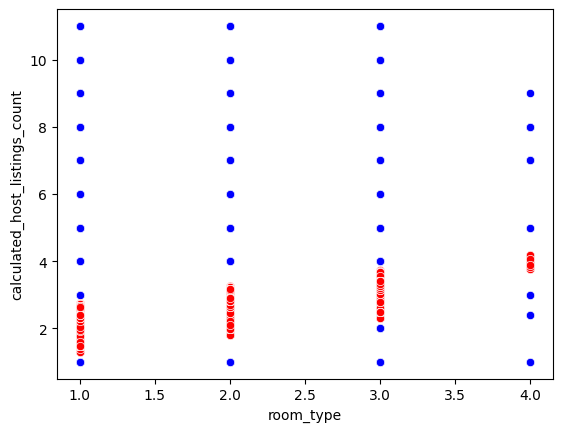

In [58]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='room_type', y='Pred_3', color="red", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

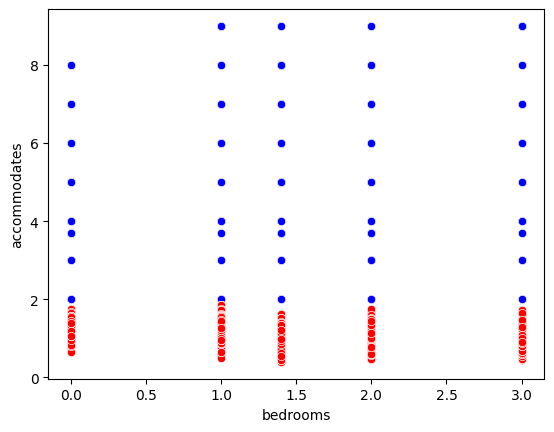

In [59]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='bedrooms', y='Pred_4', color="red", data=f1)

<Axes: xlabel='accommodates', ylabel='bedrooms'>

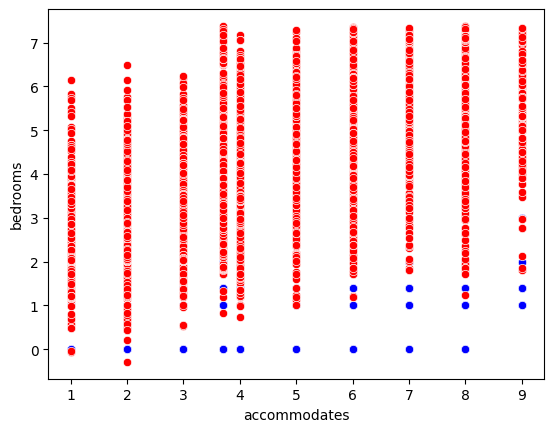

In [60]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='accommodates', y='bedrooms', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='Pred_5', color="red", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

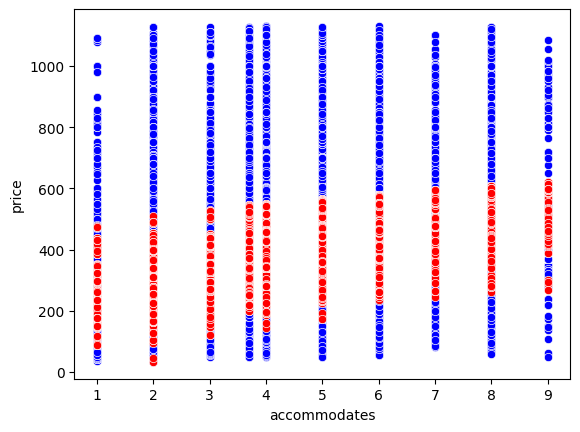

In [61]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='accommodates', y='price', color="blue", data=f1)
sns.scatterplot(x='accommodates', y='Pred_7', color="red", data=f1)

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

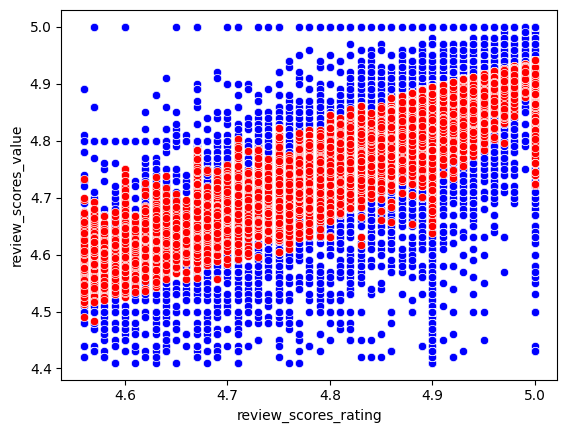

In [62]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="blue", data=f1)
sns.scatterplot(x='review_scores_rating', y='Pred_8', color="red", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

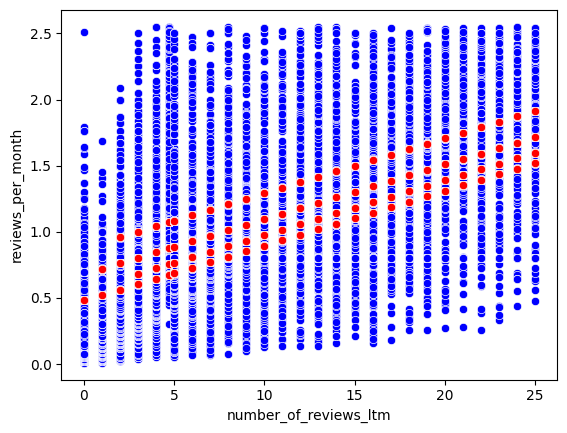

In [63]:
#Visualizamos la gráfica comparativa entre lo real y lo predecido para la variable con mayor correlación inicial

sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_9', color="red", data=f1)

In [64]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.12396560197457063

In [65]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.19996307811504688

In [66]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.02441519474073972

In [67]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.1867086600778205

In [68]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

0.5438538274454661

In [69]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7=model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter7

0.43226978908951663

In [70]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8=model8.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter8

0.1857650978260812

In [71]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter9=model9.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter9

0.445412650309147

In [72]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter10=model10.score(X=Vars_Indep10, y=Var_Dep10)
coef_Deter10

0.35574041186664274

In [73]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

0.3520874919314383

In [74]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

0.4471723136723101

In [75]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

0.15625362312836052

In [76]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

0.4320979750910903

In [77]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

0.7374644584286527

In [78]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

0.6574722724872256

In [79]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

0.43100475383234604

In [80]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

0.6673924260202141

In [81]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

0.5964397805869782